In [12]:
# Import the data 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === STEP 1: Load your data ===
# Example structure:
#   time (days) | growth (mg/L) | group
#   -----------------------------------------
#       0       |      0.1       |  Control
#       1       |      0.3       |  Control
#       0       |      0.1       |  Nutrient+

df = pd.read_csv("algae_growth.csv")
#  show the first few rows of data 
df.head()


,time,growth,group
0,0,4.439524,Control
1,1,6.769823,Control
2,2,10.558708,Control
3,3,11.070508,Control
4,4,13.129288,Control


In [13]:
# set colors 
cb_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442",
             "#0072B2", "#D55E00", "#CC79A7"]


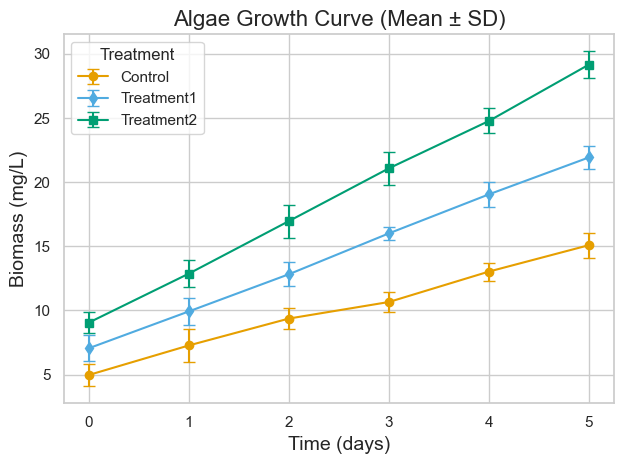

In [ ]:
# with manual error bars 
# set your own colours
sns.set_palette(cb_colors)
# === STEP 2: Compute means and standard deviations ===
grouped = df.groupby(['time', 'group']).agg(
    mean_biomass=('growth', 'mean'),
    std_biomass=('growth', 'std')
).reset_index()
# Plot with manual error bars using matplotlib for full control
# if you want more markers: https://matplotlib.org/stable/api/markers_api.html
markers = ['o', 'd', 's', 'v', '.', '^', '*']

for i, treatment in enumerate(grouped['group'].unique()):
    data = grouped[grouped['group'] == treatment]
    plt.errorbar(
        data['time'],
        data['mean_biomass'],
        yerr=data['std_biomass'],
        label=treatment,
        marker=markers[i],
        linestyle='-',
        capsize=4
    )

# === STEP 4: Customize plot ===
plt.title("Algae Growth Curve (Mean ± SD)", fontsize=16)
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Biomass (mg/L)", fontsize=14)
plt.legend(title='Treatment')
plt.tight_layout()

# === STEP 5: Show or save ===
plt.savefig("figs/algae_growth_averaged.png", dpi=300)
plt.show()

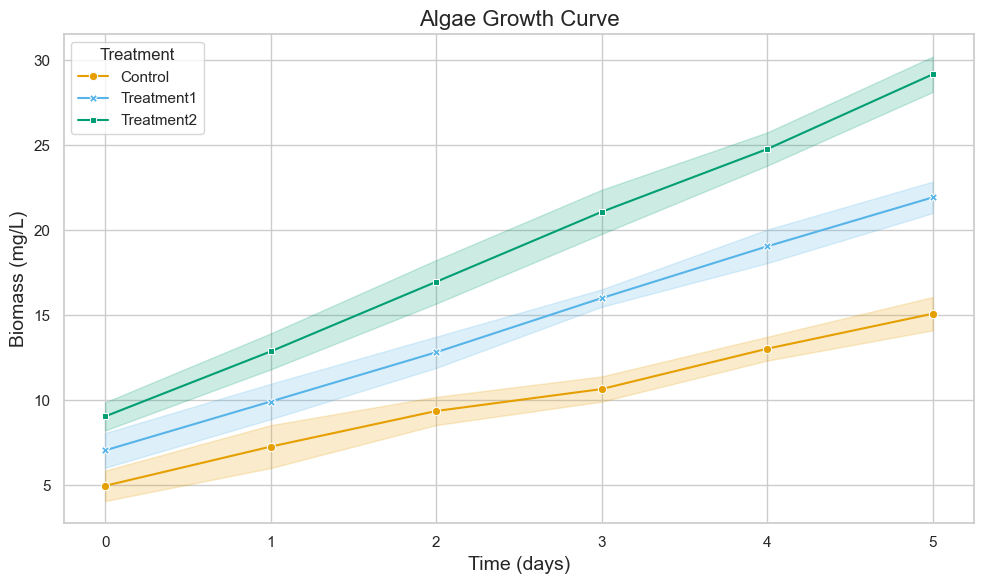

In [15]:
# with automatic error bars 
# === STEP 2: Plotting with Seaborn ===
sns.set_theme(style="whitegrid", palette=cb_colors)

plt.figure(figsize=(10, 6))

# Lineplot with optional grouping (e.g., by 'Treatment')
sns.lineplot(
    data=df,
    x='time',
    y='growth',
    hue='group',       # Remove this if no treatment groups
    style='group',     # Optional: distinguishes lines by style
    markers=True,
    dashes=False,
    err_style="band",      # Confidence interval shading
    errorbar='sd'                # 'sd' for standard deviation, or '95' for 95% CI
)

# === STEP 3: Customize plot ===
plt.title("Algae Growth Curve", fontsize=16)
plt.xlabel("Time (days)", fontsize=14)
plt.ylabel("Biomass (mg/L)", fontsize=14)
plt.legend(title='Treatment')
plt.tight_layout()

# === STEP 4: Show or save plot ===
plt.savefig("figs/growth_curve.png", dpi=300)
plt.show()
